# Project 1 - Regression Task

The dataset used can be obtained from the link shared here : https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Load libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

Load dataset

In [4]:
salesdata = pd.read_csv("kc_house_data.csv")

# Outline of Data

In [5]:
salesdata.shape
salesdata.head(8)

(21613, 21)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [6]:
salesdata.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Data PreProcessing 

Convert the datatypes of certain columns for easier analysis 
Columns id, bedrooms, bathrooms, floors, waterfront, view, condition, grade, yr_built, yr_renovated, zipcode are categorical variables

In [7]:
salesdata[['id','bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated','zipcode']] = salesdata[['id','bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated','zipcode']].astype(object)

Drop the column id as it is not significant in predicting house prices

In [8]:
salesdata1 = salesdata.drop(['id'],axis=1)
salesdata1.dtypes

date              object
price            float64
bedrooms          object
bathrooms         object
sqft_living        int64
sqft_lot           int64
floors            object
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement      int64
yr_built          object
yr_renovated      object
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Handling Null Values

Creating and Handling Null Values
Drop column Price so that null values are not popultated for this column 

In [9]:
salesdata_price = salesdata1['price']
salesdata_new = salesdata1.drop(['price'],axis=1)
np.random.seed(0)
salesdata_new = salesdata_new.mask(np.random.random(salesdata_new.shape) < .051)
salesdata_new.isnull().sum()

date             1128
bedrooms         1099
bathrooms        1140
sqft_living      1120
sqft_lot         1069
floors           1061
waterfront       1096
view             1119
condition        1078
grade            1087
sqft_above       1127
sqft_basement    1080
yr_built         1031
yr_renovated     1177
zipcode          1128
lat              1087
long             1137
sqft_living15    1097
sqft_lot15       1123
dtype: int64

In [10]:
salesdata_new[salesdata_new.isnull().any(axis=1)]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1,1180.0,5650.0,1,0,0,3,7,1180.0,0.0,1955,0,98178,47.5112,NaN,1340.0,5650.0
1,20141209T000000,3,2.25,2570.0,7242.0,2,0,0,3,7,2170.0,400.0,1951,1991,98125,NaN,-122.319,1690.0,7639.0
3,20141209T000000,4,3,1960.0,5000.0,1,0,0,5,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,NaN
5,20140512T000000,4,NaN,5420.0,NaN,1,0,0,3,11,3890.0,1530.0,2001,0,98053,47.6561,-122.005,4760.0,101930.0
6,20140627T000000,3,2.25,1715.0,6819.0,2,0,0,3,7,1715.0,0.0,NaN,0,98003,47.3097,-122.327,2238.0,6819.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,3,2.5,1530.0,1131.0,NaN,0,0,3,8,1530.0,0.0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21609,20150223T000000,4,2.5,NaN,5813.0,2,0,0,3,8,2310.0,NaN,NaN,0,98146,47.5107,-122.362,1830.0,7200.0
21610,20140623T000000,2,0.75,1020.0,1350.0,NaN,0,0,3,7,1020.0,0.0,2009,NaN,98144,47.5944,-122.299,1020.0,2007.0
21611,20150116T000000,3,2.5,1600.0,2388.0,2,0,NaN,3,8,1600.0,0.0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


13637 rows have null values in them.Hence, we impute null values at every possible scenario.

Using the complete dataset along with price column to impute null values

In [11]:
salesdata_final = pd.concat([salesdata_new,salesdata_price],axis=1)

In [12]:
salesdata_final.shape

(21613, 20)

Splitting the date column to sale year and sale month 

In [13]:
salesdata_final['sale_year'] = salesdata_final['date'].str[:4]

In [14]:
salesdata_final['sale_month'] = salesdata_final['date'].str[4:6]

In [15]:
salesdata_final.sale_year.fillna('nan',inplace=True)
salesdata_final.sale_month.fillna('nan',inplace=True)

In [16]:
salesdata_final['sale_year'].value_counts()


2014    13890
2015     6595
nan      1128
Name: sale_year, dtype: int64

In [17]:
salesdata_final['sale_year'].unique()

array(['2014', '2015', 'nan'], dtype=object)

In [18]:
salesdata_final['sale_month'].value_counts()


05     2282
04     2110
06     2083
07     2081
08     1851
10     1779
03     1769
09     1682
12     1404
11     1330
02     1188
nan    1128
01      926
Name: sale_month, dtype: int64

In [19]:
salesdata_final['sale_month'].unique()

array(['10', '12', '02', '05', '06', '01', '04', '03', '07', '08', '11',
       'nan', '09'], dtype=object)

In [20]:
salesdata_month = salesdata_final[['sale_month','price']]
salesdata_month.groupby('sale_month').mean()

,price
sale_month,
01,522241.234341
02,510867.191919
03,544219.411532
04,559923.529384
05,550857.783961
06,559200.219395
07,544410.160980
08,537774.263641
09,526874.859096


Since the mean values of the house doesnot vary much over each month we can drop nan values.

In [21]:
salesdata_final = salesdata_final[salesdata_final.sale_month != 'nan']

In [22]:
salesdata_year = salesdata_final[['sale_year','price']]
salesdata_year.groupby('sale_year').mean()

,price
sale_year,
2014,539228.267171
2015,540955.487945


Impute nan values with 2015 and replacing 2014 with 0 and 2015 with 1

In [23]:
salesdata_final['sale_year'] = salesdata_final['sale_year'].replace({'nan':'2015'})

In [24]:
salesdata_final['sale_year'] = salesdata_final['sale_year'].replace({'2014':'0'})
salesdata_final['sale_year'] = salesdata_final['sale_year'].replace({'2015':'1'})
salesdata_final['sale_year'].value_counts()

0    13890
1     6595
Name: sale_year, dtype: int64

To deal with null values in columns bedrooms and bathrooms 

In [25]:
salesdata_final.bedrooms.fillna('nan',inplace=True)
salesdata_final.bathrooms.fillna('nan',inplace=True)

In [26]:
salesdata_final['bedrooms'].unique()

array([3, 2, 4, 5, 'nan', 1, 6, 7, 0, 8, 9, 11, 10, 33], dtype=object)

In [27]:
salesdata_final['bedrooms'].value_counts()


3      8863
4      6199
2      2452
5      1431
nan    1046
6       243
1       180
7        36
8        13
0        12
9         5
10        3
33        1
11        1
Name: bedrooms, dtype: int64

In [28]:
salesdata_final['bathrooms'].unique()


array([1.0, 2.25, 3.0, 2.0, 'nan', 1.5, 2.5, 1.75, 2.75, 3.25, 4.0, 3.5,
       0.75, 4.75, 5.0, 4.25, 4.5, 3.75, 0.0, 1.25, 5.25, 6.0, 0.5, 5.5,
       6.75, 5.75, 8.0, 7.5, 7.75, 6.25, 6.5], dtype=object)

In [29]:
salesdata_final['bathrooms'].value_counts()

2.5     4845
1.0     3466
1.75    2747
2.25    1837
2.0     1726
1.5     1286
nan     1073
2.75    1071
3.0      671
3.5      663
3.25     517
3.75     139
4.0      119
4.5       87
4.25      73
0.75      67
4.75      19
5.0       19
5.25      13
0.0        9
5.5        9
1.25       7
6.0        6
5.75       4
0.5        4
8.0        2
6.75       2
7.75       1
6.25       1
7.5        1
6.5        1
Name: bathrooms, dtype: int64

Values with 0 bedroom and bathromm are dropped since its not practical

In [30]:
salesdata_final = salesdata_final[salesdata_final.bedrooms != 0]
salesdata_final = salesdata_final[salesdata_final.bathrooms != 0]

Based on the values, replace nan values for bedroom with 3 and for bathrooms with 2.25

In [31]:
salesdata_final['bedrooms'] = salesdata_final['bedrooms'].replace({'nan':3})
salesdata_final['bathrooms'] = salesdata_final['bathrooms'].replace({'nan':2.25})

Considering the next column with null values - sqft_living

In [32]:
salesdata_final['sqft_living'].isnull().sum()

1062

In [33]:
salesdata_final['sqft_living'].median()

1920.0

In [34]:
salesdata_final['sqft_living'].describe()

count    19408.000000
mean      2081.284367
std        917.777180
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

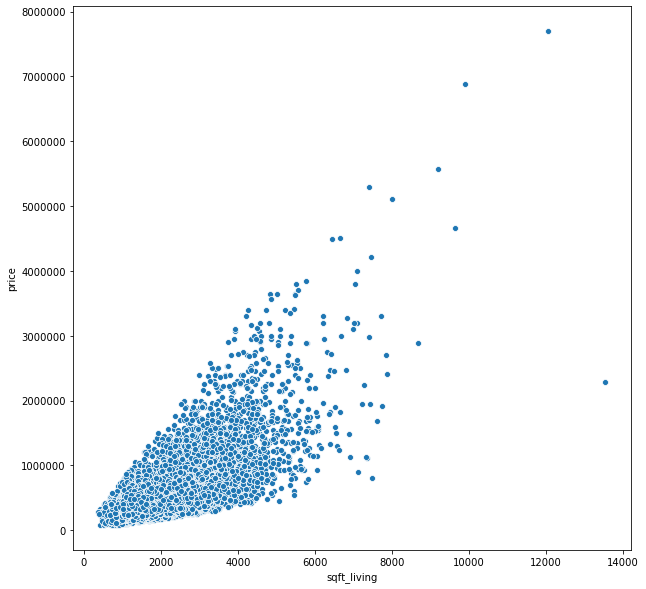

In [35]:
a4_dims = (10,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x='sqft_living',y='price',data=salesdata_final)

Replacing null values with median values 

In [36]:
salesdata_final['sqft_living']=salesdata_final['sqft_living'].fillna(salesdata_final['sqft_living'].median())

In [37]:
salesdata_final.isnull().sum()

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot         1022
floors           1000
waterfront       1025
view             1078
condition        1019
grade            1031
sqft_above       1079
sqft_basement    1030
yr_built          971
yr_renovated     1102
zipcode          1060
lat              1027
long             1078
sqft_living15    1041
sqft_lot15       1059
price               0
sale_year           0
sale_month          0
dtype: int64

Considering next column into account - sqft_loft 

In [38]:
salesdata_final['sqft_lot'].isnull().sum()

1022

In [39]:
salesdata_final['sqft_lot'].describe()

count    1.944800e+04
mean     1.506629e+04
std      4.177920e+04
min      5.200000e+02
25%      5.053750e+03
50%      7.620000e+03
75%      1.070400e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [40]:
salesdata_final['sqft_lot'].median()

7620.0

Replace null values with median 

In [41]:
salesdata_final['sqft_lot']=salesdata_final['sqft_lot'].fillna(salesdata_final['sqft_lot'].median())

In [42]:
salesdata_final['sqft_lot'].isnull().sum()

0

Now considering floor null values

In [43]:
salesdata_final.floors.fillna('nan',inplace=True)

In [44]:
salesdata_final['floors'].value_counts()

1.0    9602
2.0    7436
1.5    1731
nan    1000
3.0     549
2.5     145
3.5       7
Name: floors, dtype: int64

In [45]:
salesdata_price_floors = salesdata_final[['floors','price']]
salesdata_price_floors.groupby('floors').mean()

,price
floors,
1.0,4.415906e+05
1.5,5.584669e+05
2.0,6.483285e+05
2.5,1.069188e+06
3.0,5.889418e+05
3.5,9.102143e+05
nan,5.388322e+05


Compute null vlaues with the value of 1.5

In [46]:
salesdata_final['floors'] = salesdata_final['floors'].replace({'nan':1.5})

In [47]:
salesdata_final['floors'].value_counts()

1.0    9602
2.0    7436
1.5    2731
3.0     549
2.5     145
3.5       7
Name: floors, dtype: int64

Null values for waterfront 

In [48]:
salesdata_final.waterfront.fillna('nan',inplace=True)
salesdata_final['waterfront'].value_counts()

0      19302
nan     1025
1        143
Name: waterfront, dtype: int64

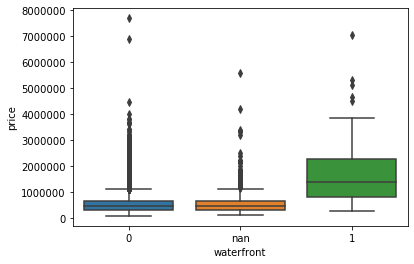

In [49]:
sns.boxplot(x='waterfront',y='price',data=salesdata_final)

The values in 0 closely align to values in nan, hence computing null values with 0

In [50]:
val = 0
salesdata_final['waterfront'] = salesdata_final['waterfront'].replace({'nan':val})


In [51]:
salesdata_final['waterfront'].value_counts()

0    20327
1      143
Name: waterfront, dtype: int64

In [52]:
salesdata_final.isnull().sum()

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view             1078
condition        1019
grade            1031
sqft_above       1079
sqft_basement    1030
yr_built          971
yr_renovated     1102
zipcode          1060
lat              1027
long             1078
sqft_living15    1041
sqft_lot15       1059
price               0
sale_year           0
sale_month          0
dtype: int64

Let's consider sqft_living15 and sqft_lot15 attributes and replace null values with mean values

In [53]:
salesdata_final['sqft_living15']=salesdata_final['sqft_living15'].fillna(salesdata_final['sqft_living15'].mean())
salesdata_final['sqft_lot15']=salesdata_final['sqft_lot15'].fillna(salesdata_final['sqft_lot15'].mean())

We are dropping columns lat and long, hence their null values are not dealt with here

In [54]:
salesdata_final = salesdata_final.drop(['lat','long'],axis=1)

Null values in yr_built

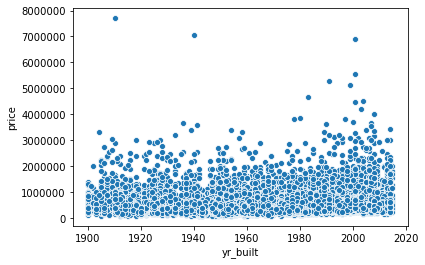

In [55]:
sns.scatterplot(x='yr_built',y='price',data=salesdata_final)

It is clear from the graph that the value of price doesnt change significantly based of year built hence we can drop the column

In [56]:
salesdata_final = salesdata_final.drop(['yr_built'],axis=1)

Null values in yr_renovated

In [57]:
salesdata_final.yr_renovated.fillna('nan',inplace=True)

In [58]:
salesdata_final['yr_renovated'].unique()

array([0, 1991, 'nan', 2002, 2010, 1992, 2013, 2005, 2008, 2003, 1994,
       1984, 1954, 2014, 2011, 1974, 1999, 1983, 1990, 1988, 1957, 1977,
       1981, 1995, 1978, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 2001, 1980, 1971, 1945, 1979, 1997, 1950, 1948,
       2015, 2012, 1968, 1963, 1951, 1993, 1962, 1996, 1972, 1985, 1953,
       1955, 1982, 1956, 1969, 1940, 1946, 1975, 1958, 1964, 1976, 1959,
       1960, 1967, 1965, 1934, 1944], dtype=object)

Grouping them on basis of renovated and non renovated by conisdering values of 0 and 1

In [59]:
salesdata_final.loc[((salesdata_final.yr_renovated != 0) & (salesdata_final.yr_renovated != 'nan')),'yr_renovated']='1'

In [60]:
salesdata_final['yr_renovated'].value_counts()

0      18559
nan     1102
1        809
Name: yr_renovated, dtype: int64

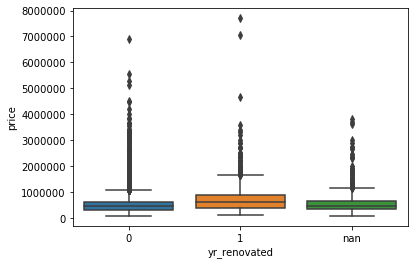

In [61]:
sns.boxplot(x='yr_renovated',y='price',data=salesdata_final)

In [62]:
salesdata_final['yr_renovated'] = salesdata_final['yr_renovated'].replace({'nan':0})

In [63]:
salesdata_final['yr_renovated'].value_counts()

0    19661
1      809
Name: yr_renovated, dtype: int64

Plug in nan values in column 'view' which has no data in it initially  

In [64]:
salesdata_final.view.fillna('nan',inplace=True)

In [65]:
salesdata_final['view'].value_counts()

0      17520
nan     1078
2        846
3        444
1        299
4        283
Name: view, dtype: int64

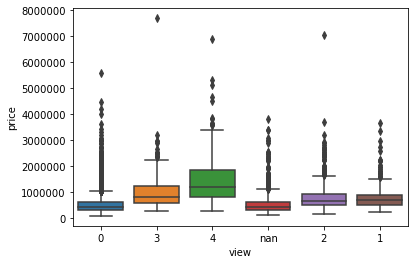

In [66]:
sns.boxplot(x='view',y='price',data=salesdata_final)

Price range for 0 and nan is the same hence we impute nan with 0

In [67]:
num = 0
salesdata_final['view'] = salesdata_final['view'].replace({'nan':num})
salesdata_final['view'].value_counts()

0    18598
2      846
3      444
1      299
4      283
Name: view, dtype: int64

Taking into account 'condition' attribute to eliminate the null values

In [68]:
salesdata_final.condition.fillna('nan',inplace=True)
salesdata_final['condition'].value_counts()
salesdata_price_condition = salesdata_final[['condition','price']]
salesdata_price_condition.groupby('condition').mean()

3      12584
4       5147
5       1544
nan     1019
2        147
1         29
Name: condition, dtype: int64

,price
condition,
1,341067.241379
2,318611.489796
3,540408.542673
4,522513.077715
5,611373.721503
nan,550373.647694


Replace nan with 3 since the price range values is the closest to it

In [69]:
new = 3
salesdata_final['condition'] = salesdata_final['condition'].replace({'nan':new})
salesdata_final['condition'].value_counts()

3    13603
4     5147
5     1544
2      147
1       29
Name: condition, dtype: int64

Looking into 'grade' attribute in the same way

In [70]:
salesdata_final.grade.fillna('nan',inplace=True)
salesdata_final['grade'].value_counts()

7      8098
8      5477
9      2330
6      1818
nan    1031
10     1027
11      352
5       218
12       79
4        26
13       13
3         1
Name: grade, dtype: int64

In [71]:
salesdata_final['grade'] = salesdata_final['grade'].replace({1:0,3:0,4:1,5:1,6:1,7:2,8:3,9:3,10:3,11:4,12:4,13:4})
salesdata_final['grade'].unique()

array([2, 1, 3, 4, 'nan', 0], dtype=object)

In [72]:
salesdata_price_grade = salesdata_final[['grade','price']]
salesdata_price_grade.groupby('grade').mean()

,price
grade,
0,2.620000e+05
1,2.956212e+05
2,4.026813e+05
3,6.656492e+05
4,1.690680e+06
nan,5.331155e+05


In [73]:
salesdata_final['grade'].value_counts()

3      8834
2      8098
1      2062
nan    1031
4       444
0         1
Name: grade, dtype: int64

The attribute 'grade' is an ordinal variable. Hence, let's assign a new value 2.5 to the nan value, so that higher the grade, higher the price.

In [74]:
salesdata_final['grade'] = salesdata_final['grade'].replace({'nan':2.5})

In [75]:
salesdata_final['grade'].value_counts()

3.0    8834
2.0    8098
1.0    2062
2.5    1031
4.0     444
0.0       1
Name: grade, dtype: int64

In [76]:
salesdata_final.isnull().sum()

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above       1079
sqft_basement    1030
yr_renovated        0
zipcode          1060
sqft_living15       0
sqft_lot15          0
price               0
sale_year           0
sale_month          0
dtype: int64

Considering null values of sqft_above and sqft_basement

In [77]:
salesdata_final['sqft_above'].describe()

count    19391.000000
mean      1788.368934
std        827.641928
min        380.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

In [78]:
salesdata_final['sqft_basement'].describe()

count    19440.000000
mean       290.629835
std        442.046942
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

Fill the null values with mean and median

In [79]:
salesdata_final['sqft_above']=salesdata_final['sqft_above'].fillna(salesdata_final['sqft_above'].mean())
salesdata_final['sqft_basement']=salesdata_final['sqft_basement'].fillna(salesdata_final['sqft_basement'].median())

Considering the zipcode attribute now

In [80]:
salesdata_final.zipcode.fillna('nan',inplace=True)
salesdata_final['zipcode'].value_counts()

nan      1060
98103     545
98038     537
98115     522
98052     516
         ... 
98102      91
98010      85
98024      69
98148      55
98039      44
Name: zipcode, Length: 71, dtype: int64

Let's group the zipcode based on price to get a range of suitable zipcodes

In [81]:
salesdata_final['zipcode'].value_counts()
salesdata_price_floors = salesdata_final[['zipcode','price']]

nan      1060
98103     545
98038     537
98115     522
98052     516
         ... 
98102      91
98010      85
98024      69
98148      55
98039      44
Name: zipcode, Length: 71, dtype: int64

In [82]:
newzipcode_data = salesdata_price_floors.groupby('zipcode').mean()
newzipcode_data = pd.DataFrame(newzipcode_data)
newzipcode_data['zipcode'] = newzipcode_data.index
newzipcode_data.columns
newzipcode_data.sort_values('price')

Index(['price', 'zipcode'], dtype='object')

,price,zipcode
zipcode,,
98002,2.343375e+05,98002
98168,2.392333e+05,98168
98032,2.510807e+05,98032
98001,2.817160e+05,98001
98023,2.854189e+05,98023
...,...,...
98102,9.076143e+05,98102
98112,1.101850e+06,98112
98040,1.191401e+06,98040


In [83]:
newzipcode_data.loc[((newzipcode_data.price < 300000)),'price']= 1
newzipcode_data.loc[((newzipcode_data.price >= 300000) & (newzipcode_data.price <= 600000)),'price']= 2
newzipcode_data.loc[((newzipcode_data.price > 600000) & (newzipcode_data.price <= 900000)),'price']= 3
newzipcode_data.loc[(newzipcode_data.price >= 900000),'price']= 4

In [84]:
newzipcode_data['price']. value_counts()

2.0    36
3.0    20
1.0    10
4.0     5
Name: price, dtype: int64

In [85]:
q = newzipcode_data.loc[newzipcode_data['price']==1]
q_1 = q['zipcode'].unique()
q_1

array([98001, 98002, 98003, 98023, 98030, 98031, 98032, 98148, 98168,
       98188], dtype=object)

In [86]:
w = newzipcode_data.loc[newzipcode_data['price']==2]
w_1 = w['zipcode'].unique()
w_1

array([98010, 98011, 98014, 98019, 98022, 98024, 98028, 98034, 98038,
       98042, 98045, 98055, 98056, 98058, 98059, 98065, 98070, 98072,
       98092, 98103, 98106, 98107, 98108, 98117, 98118, 98125, 98126,
       98133, 98136, 98144, 98146, 98155, 98166, 98178, 98198, 'nan'],
      dtype=object)

In [87]:
e = newzipcode_data.loc[newzipcode_data['price']==3]
e_1 = e['zipcode'].unique()
e_1

array([98005, 98006, 98007, 98008, 98027, 98029, 98033, 98052, 98053,
       98074, 98075, 98077, 98105, 98109, 98115, 98116, 98119, 98122,
       98177, 98199], dtype=object)

In [88]:
r = newzipcode_data.loc[newzipcode_data['price']==4]
r_1 = r['zipcode'].unique()
r_1

array([98004, 98039, 98040, 98102, 98112], dtype=object)

Grouping of zipcodes and dropping the null values

In [89]:
salesdata_final = salesdata_final[salesdata_final.zipcode != 'nan']
salesdata_final['zipcode'].isnull().sum()

0

In [90]:
salesdata_final['zipcode'] = salesdata_final['zipcode'].astype(object)

In [91]:
salesdata_final['zipcode'] = salesdata_final['zipcode'].replace(q_1, '1')
salesdata_final['zipcode'] = salesdata_final['zipcode'].replace(w_1, '2')
salesdata_final['zipcode'] = salesdata_final['zipcode'].replace(e_1, '3')
salesdata_final['zipcode'] = salesdata_final['zipcode'].replace(r_1, '4')

In [92]:
salesdata_final['zipcode'].value_counts()

2    10396
3     5880
1     2207
4      927
Name: zipcode, dtype: int64

Dropping date attribute 

In [93]:
salesdata_final = salesdata_final.drop(['date'],axis=1)

In [94]:
salesdata_final.shape

(19410, 18)

In [95]:
salesdata_final.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,sale_year,sale_month
0,3,1.00,1180.0,5650.0,1.0,0,0,3,2.0,1180.0,0.0,0,2,1340.0,5650.000000,221900.0,0,10
1,3,2.25,2570.0,7242.0,2.0,0,0,3,2.0,2170.0,400.0,1,2,1690.0,7639.000000,538000.0,0,12
2,2,1.00,770.0,10000.0,1.0,0,0,3,1.0,770.0,0.0,0,2,2720.0,8062.000000,180000.0,1,02
3,4,3.00,1960.0,5000.0,1.0,0,0,5,2.0,1050.0,910.0,0,2,1360.0,12761.664005,604000.0,0,12
4,3,2.00,1680.0,8080.0,1.0,0,0,3,3.0,1680.0,0.0,0,3,1800.0,7503.000000,510000.0,1,02


In [96]:
salesdata_final.dtypes

bedrooms           int64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_renovated      object
zipcode           object
sqft_living15    float64
sqft_lot15       float64
price            float64
sale_year         object
sale_month        object
dtype: object

In [97]:
salesdata_final['yr_renovated'] = salesdata_final['yr_renovated'].astype(int)
salesdata_final['sale_year'] = salesdata_final['sale_year'].astype(int)

Perform one hot vector encoding for the column sale_month

In [98]:
kingscounty_sales = pd.get_dummies(salesdata_final)

In [99]:
kingscounty_sales.shape

(19410, 32)

In [100]:
kingscounty_sales.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'price',
       'sale_year', 'zipcode_1', 'zipcode_2', 'zipcode_3', 'zipcode_4',
       'sale_month_01', 'sale_month_02', 'sale_month_03', 'sale_month_04',
       'sale_month_05', 'sale_month_06', 'sale_month_07', 'sale_month_08',
       'sale_month_09', 'sale_month_10', 'sale_month_11', 'sale_month_12'],
      dtype='object')

In [101]:
kingscounty_sales.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,sale_month_03,sale_month_04,sale_month_05,sale_month_06,sale_month_07,sale_month_08,sale_month_09,sale_month_10,sale_month_11,sale_month_12
0,3,1.00,1180.0,5650.0,1.0,0,0,3,2.0,1180.0,...,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570.0,7242.0,2.0,0,0,3,2.0,2170.0,...,0,0,0,0,0,0,0,0,0,1
2,2,1.00,770.0,10000.0,1.0,0,0,3,1.0,770.0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,0,5,2.0,1050.0,...,0,0,0,0,0,0,0,0,0,1
4,3,2.00,1680.0,8080.0,1.0,0,0,3,3.0,1680.0,...,0,0,0,0,0,0,0,0,0,0
5,4,2.25,5420.0,7620.0,1.0,0,0,3,4.0,3890.0,...,0,0,1,0,0,0,0,0,0,0
6,3,2.25,1715.0,6819.0,2.0,0,0,3,2.0,1715.0,...,0,0,0,1,0,0,0,0,0,0
7,3,1.50,1060.0,9711.0,1.0,0,0,3,2.0,1060.0,...,0,0,0,0,0,0,0,0,0,0
9,3,2.25,1890.0,6560.0,2.0,0,0,3,2.0,1890.0,...,1,0,0,0,0,0,0,0,0,0
11,2,1.00,1160.0,6000.0,1.5,0,0,4,2.0,860.0,...,0,0,1,0,0,0,0,0,0,0


# Train and Test Data Split

Splitting the data into Train and Test 

In [102]:
X = kingscounty_sales.drop(['price'],axis=1)
y = kingscounty_sales['price']

X_traindata, X_testdata, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
y_train.shape

(14557,)

In [103]:
y_test.shape

(4853,)

In [104]:
X_traindata.shape

(14557, 31)

In [105]:
X_testdata.shape

(4853, 31)

In [106]:
scaler = StandardScaler()

In [107]:
X_train_scale = scaler.fit_transform(X_traindata)

In [108]:
X_test_scale = scaler.transform(X_testdata)

# Linear Regression

In [109]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
parameters = {'normalize':[True,False]}
grid_search_lr = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search_lr.fit(X_traindata, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'normalize': [True, False]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

In [110]:
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lr.best_score_))

Best parameters: {'normalize': True}
Best cross-validation score: 0.7039


In [111]:
output = pd.DataFrame(grid_search_lr.cv_results_)
output

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.014784,0.001063,0.001663,4.697690e-04,True,{'normalize': True},0.709608,0.716118,0.720027,0.697553,...,0.012651,1,0.706208,0.705047,0.704192,0.708333,0.711879,0.708505,0.707361,0.002562
1,0.013948,0.000585,0.000998,7.207536e-07,False,{'normalize': False},0.709625,0.716089,0.719894,0.697534,...,0.012626,2,0.706213,0.705056,0.704224,0.708336,0.711885,0.708506,0.707370,0.002556


In [112]:
linreg = LinearRegression(normalize = True)
linreg.fit(X_traindata, y_train)
print(linreg.score(X_traindata, y_train))
print(linreg.score(X_testdata, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

0.7069561645872875
0.7054360786523051


In [113]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(linreg , X_traindata, y_train, cv=kfold)))
val = cross_val_score(linreg , X_traindata, y_train, cv=kfold)
print(np.mean(val))

Cross-validation scores:
[0.70960753 0.71611763 0.72002693 0.6975525  0.68330304 0.69656092]
0.7038614246686351


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Text(0.5, 0, 'sqft_living')

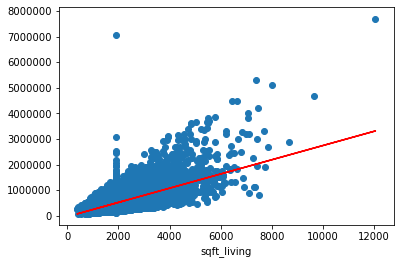

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_array = X_traindata.to_numpy()

X_train_rm = X_train_array[:,2].reshape(-1,1)
linreg.fit(X_train_rm, y_train)
y_pred = linreg.predict(X_train_rm)

plt.plot(X_train_rm, y_pred, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('sqft_living')

Linear Regression Result:
Best parameter: {'normalize': True}
Average Cross validation score: 0.7038
Test score: 0.7054

# KNN Regression

In [115]:
knn_parms = {'n_neighbors':[1,5,10,15,20]}

In [116]:
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn, knn_parms,cv=6,return_train_score=True,n_jobs= -1)
grid_search_knn.fit(X_train_scale, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [117]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_knn.best_score_))

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.7051


In [118]:
pd.DataFrame(grid_search_knn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.318482,0.046955,2.747655,0.423635,1,{'n_neighbors': 1},0.592134,0.622535,0.619786,0.530163,...,0.036369,5,1.000000,0.999999,0.999999,1.000000,0.999999,0.999999,1.000000,3.534154e-07
1,0.340590,0.033509,3.848985,0.641627,5,{'n_neighbors': 5},0.706774,0.718098,0.719744,0.719948,...,0.024723,2,0.793072,0.796259,0.795847,0.801615,0.808304,0.801869,0.799494,5.045726e-03
2,0.419444,0.029784,5.174423,0.433563,10,{'n_neighbors': 10},0.710293,0.715626,0.718757,0.714730,...,0.018587,1,0.751369,0.752289,0.750330,0.755683,0.764954,0.759887,0.755752,5.202373e-03
3,0.414184,0.011996,4.926798,0.123307,15,{'n_neighbors': 15},0.703749,0.704602,0.705746,0.704762,...,0.020405,3,0.727925,0.727956,0.729058,0.732730,0.742003,0.734934,0.732434,4.994907e-03
4,0.427541,0.048647,5.116960,0.183487,20,{'n_neighbors': 20},0.691178,0.700316,0.696074,0.696653,...,0.021290,4,0.710162,0.709354,0.708808,0.711955,0.723584,0.715161,0.713170,5.107723e-03


In [119]:
knn_data = KNeighborsRegressor(n_neighbors = 10)
knn_data.fit(X_train_scale, y_train)
print(knn_data.score(X_train_scale, y_train))
print(knn_data.score(X_test_scale, y_test))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

0.7596338833761177
0.7091548053079557


In [120]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(knn_data, X_train_scale, y_train, cv=kfold)))
vals = cross_val_score(knn_data, X_train_scale, y_train, cv=kfold)
print(np.mean(vals))

Cross-validation scores:
[0.71029319 0.71562632 0.71875725 0.71472986 0.66443416 0.70654159]
0.7050637288170553


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

Text(0.5, 0, 'sqft_living')

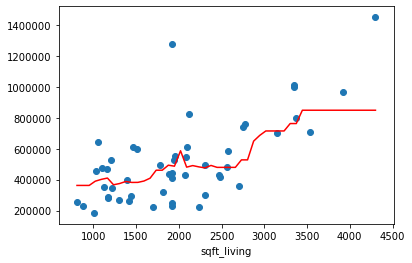

In [121]:
X_q = X_train_array[:50,2].reshape(-1,1)
y_q = y_train[:50]

knn_reg_model = KNeighborsRegressor(10)
knn_reg_model.fit(X_q, y_q)

X_w=np.linspace(X_q.min(), X_q.max(), 50).reshape(50, 1)
y_pred = knn_reg_model.predict(X_w)

plt.plot(X_w, y_pred, c = 'r')
plt.scatter(X_q, y_q)
plt.xlabel('sqft_living')

KNN Regression Result:
Best parameter: {n_neighbors: 10}
Average Cross validation score: 0.7050
Test score: 0.7091

# Ridge Regression

In [122]:
ridge_parms = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [123]:
ridge = Ridge()
grid_ridge = GridSearchCV(estimator = ridge,param_grid = ridge_parms,return_train_score=True,n_jobs= -1,cv=5)
grid_ridge.fit(X_traindata, y_train)
print("Best parameters: {}".format(grid_ridge.best_params_))

print("Best cross-validation score: {:.4f}".format(grid_ridge.best_score_))

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'alpha': 1}
Best cross-validation score: 0.7044


In [124]:
ridge_reg = Ridge(alpha = 1)
ridge_reg.fit(X_traindata, y_train)
print(ridge_reg.score(X_traindata, y_train))
print(ridge_reg.score(X_testdata, y_test))

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

0.7069982548814961
0.7058583518270751


In [125]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(ridge_reg , X_traindata, y_train, cv=kfold)))
vals = cross_val_score(ridge_reg , X_traindata, y_train, cv=kfold)
print(np.mean(vals))

Cross-validation scores:
[0.7097873  0.71599983 0.71998271 0.69773947 0.68300824 0.69661781]
0.7038558924850089


In [126]:
output_ridge = pd.DataFrame(grid_ridge.cv_results_)
output_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018746,0.006248,0.000000,0.000000,0.01,{'alpha': 0.01},0.711764,0.705579,0.714666,0.696597,...,0.704393,0.008293,3,0.705423,0.707091,0.704962,0.709036,0.710212,0.707345,0.002026
1,0.021871,0.015931,0.000000,0.000000,0.1,{'alpha': 0.1},0.711779,0.705577,0.714681,0.696577,...,0.704394,0.008303,2,0.705423,0.707091,0.704962,0.709036,0.710212,0.707345,0.002026
2,0.018746,0.006248,0.003124,0.006249,1,{'alpha': 1},0.711920,0.705553,0.714820,0.696372,...,0.704405,0.008399,1,0.705419,0.707087,0.704957,0.709033,0.710207,0.707340,0.002026
3,0.015621,0.000001,0.003124,0.006248,10,{'alpha': 10},0.712871,0.705046,0.715634,0.694395,...,0.704192,0.009250,4,0.705049,0.706754,0.704593,0.708758,0.709849,0.707000,0.002043
4,0.012498,0.006249,0.000000,0.000000,100,{'alpha': 100},0.710351,0.696113,0.709853,0.681547,...,0.696368,0.012253,5,0.696025,0.698660,0.695956,0.701624,0.701626,0.698778,0.002521


([<matplotlib.axis.XTick at 0x21e0cb67780>,
 <a list of 5 Text xticklabel objects>)

Text(0.5, 0, 'Alpha')

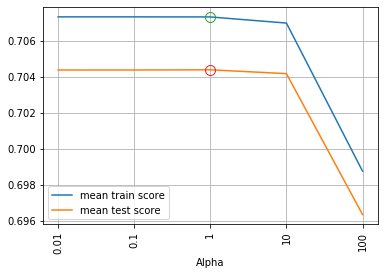

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(output_ridge.shape[0]), output_ridge['mean_train_score'], label = 'mean train score')
plt.plot(range(output_ridge.shape[0]), output_ridge['mean_test_score'], label = 'mean test score')
plt.xticks(range(output_ridge.shape[0]), output_ridge['param_alpha'], rotation = 90)
plt.plot([grid_ridge.best_index_], output_ridge['mean_train_score'][grid_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_ridge.best_index_], output_ridge['mean_test_score'][grid_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

Ridge Regression Result:
Best parameter: {'alpha': 1}
Average Cross validation score: 0.7038
Test score: 0.7058

# Lasso Regression

In [128]:
lasso_parms = {'alpha': [0.01, 0.1, 1, 10,100]}

In [129]:
lasso = Lasso()
grid_lasso = GridSearchCV(estimator = lasso,param_grid = lasso_parms,return_train_score=True,n_jobs=-1,cv=5)
grid_lasso.fit(X_traindata, y_train)
print("Best parameters: {}".format(grid_lasso.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_lasso.best_score_))

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'alpha': 10}
Best cross-validation score: 0.7044


In [130]:
lass_model = Lasso(alpha = 10)
lass_model.fit(X_traindata, y_train)
print(lass_model.score(X_traindata, y_train))
print(lass_model.score(X_testdata, y_test))

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

0.707000030861227
0.705741710476518


In [131]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(lass_model , X_traindata, y_train, cv=kfold)))
vals = cross_val_score(lass_model , X_traindata, y_train, cv=kfold)
print(np.mean(vals))

Cross-validation scores:
[0.70962305 0.71607484 0.71994218 0.69756949 0.68323561 0.69658355]
0.70383812154691


In [132]:
output_lasso = pd.DataFrame(grid_lasso.cv_results_)
output_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.677657,0.145017,0.003923,0.006051,0.01,{'alpha': 0.01},0.711763,0.705579,0.714665,0.696599,...,0.704393,0.008292,5,0.705423,0.707091,0.704962,0.709036,0.710212,0.707345,0.002026
1,1.672719,0.124725,0.004122,0.005866,0.1,{'alpha': 0.1},0.711763,0.705579,0.714665,0.696599,...,0.704393,0.008292,4,0.705423,0.707091,0.704962,0.709036,0.710212,0.707345,0.002026
2,0.969186,0.300443,0.000399,0.000798,1,{'alpha': 1},0.711764,0.705581,0.714668,0.696596,...,0.704393,0.008294,3,0.705423,0.707091,0.704962,0.709036,0.710212,0.707345,0.002026
3,0.398905,0.145976,0.003723,0.006061,10,{'alpha': 10},0.711777,0.705603,0.714698,0.696567,...,0.704398,0.008312,1,0.705422,0.707090,0.704961,0.709035,0.710211,0.707344,0.002026
4,0.140592,0.023846,0.004719,0.005629,100,{'alpha': 100},0.711878,0.705696,0.714951,0.696215,...,0.704396,0.008491,2,0.705370,0.707034,0.704907,0.708975,0.710157,0.707289,0.002025


([<matplotlib.axis.XTick at 0x21e0f191b38>,
 <a list of 5 Text xticklabel objects>)

Text(0.5, 0, 'Alpha')

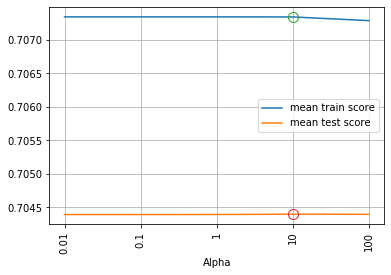

In [133]:
%matplotlib inline

plt.plot(range(output_lasso.shape[0]), output_lasso['mean_train_score'], label = 'mean train score')
plt.plot(range(output_lasso.shape[0]), output_lasso['mean_test_score'], label = 'mean test score')
plt.xticks(range(output_lasso.shape[0]), output_lasso['param_alpha'], rotation = 90)
plt.plot([grid_lasso.best_index_], output_lasso['mean_train_score'][grid_lasso.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_lasso.best_index_], output_lasso['mean_test_score'][grid_lasso.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

Lasso Regression Result:
Best parameter: {'alpha': 10}
Average Cross validation score: 0.7038
Test score: 0.7057

# Polynominal Regression

In [134]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [135]:
param_poly = {'polynomialfeatures__degree': np.arange(3)}

grid_search_poly = GridSearchCV(PolynomialRegression(),param_poly,return_train_score=True,n_jobs=-1,cv=5)

In [136]:
grid_search_poly.fit(X_traindata, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'polynomialfeatures__degree': array([0, 1, 2])},
             pre_dispatch='2*n_jobs',

In [137]:
print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_poly.best_score_))

Best parameters: {'polynomialfeatures__degree': 2}
Best cross-validation score: 0.7915


In [138]:
pol = PolynomialFeatures(degree = 2)
Xpol = pol.fit_transform(X_traindata)
X1pol = pol.fit_transform(X_testdata)
pol_reg_model = LinearRegression()
pol_reg_model.fit(Xpol,y_train)
print(pol_reg_model.score(Xpol, y_train))
print(pol_reg_model.score(X1pol, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.827800970141235
0.7942434135250376


In [139]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(pol_reg_model , Xpol, y_train, cv=kfold)))
vals = cross_val_score(pol_reg_model , Xpol, y_train, cv=kfold)
print(np.mean(vals))

Cross-validation scores:
[0.7850203  0.79793215 0.78109303 0.79162462 0.80983747 0.76740216]
0.788818287705111


In [140]:
output_poly = pd.DataFrame(grid_search_poly.cv_results_)
output_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009372,0.007653,0.000000,0.000000,0,{'polynomialfeatures__degree': 0},NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.037493,0.007653,0.003124,0.006248,1,{'polynomialfeatures__degree': 1},0.711763,0.705579,0.714665,0.696599,...,0.704393,0.008292,2,0.705423,0.707091,0.704962,0.709036,0.710212,0.707345,0.002026
2,1.175804,0.035344,0.028324,0.005697,2,{'polynomialfeatures__degree': 2},0.786826,0.790953,0.789973,0.811592,...,0.791462,0.011057,1,0.832264,0.832408,0.832170,0.824759,0.833153,0.830951,0.003115


([<matplotlib.axis.XTick at 0x21e0f23c208>,
 <a list of 3 Text xticklabel objects>)

Text(0.5, 0, 'Degree')

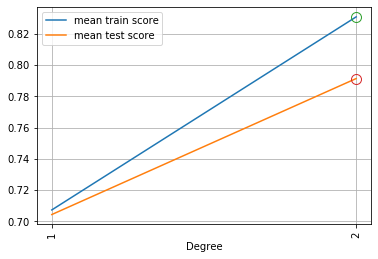

In [141]:
plt.plot(range(output_poly.shape[0]), output_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(output_poly.shape[0]), output_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(output_poly.shape[0]), output_poly['param_polynomialfeatures__degree'], rotation = 90)
plt.plot([grid_search_poly.best_index_], output_poly['mean_train_score'][grid_search_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_search_poly.best_index_], output_poly['mean_test_score'][grid_search_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.xlabel('Degree')
plt.legend()

Polynominal Regression Result:
Best parameters: {'polynomialfeatures__degree': 2}
Average Cross validation score: 0.7888
Test score: 0.7942

# Linear SVR (Simple)

In [142]:
svrl_parms = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon' : [0.01, 0.1, 1, 10, 100]}

In [143]:
linearsvr = LinearSVR()
grid_search_svrl = GridSearchCV(estimator = linearsvr,param_grid = svrl_parms,return_train_score=True,n_jobs= -1,cv=10)

In [144]:
grid_search_svrl.fit(X_train_scale,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [145]:
print("Best parameters: {}".format(grid_search_svrl.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_svrl.best_score_))

Best parameters: {'C': 100, 'epsilon': 0.1}
Best cross-validation score: 0.5549


In [146]:
lsvr_model = LinearSVR(C = 100, epsilon = 0.1)
        
lsvr_model.fit(X_train_scale, y_train)

print(lsvr_model.score(X_train_scale, y_train))
print(lsvr_model.score(X_test_scale, y_test))

LinearSVR(C=100, dual=True, epsilon=0.1, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

0.5676317761066476
0.5714652665419389


In [148]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(lsvr_model , X_train_scale, y_train, cv=kfold)))
vals = cross_val_score(lsvr_model, X_train_scale, y_train, cv=kfold)
print(np.mean(vals))

Cross-validation scores:
[0.54368223 0.57164709 0.56384241 0.55521531 0.584932   0.58348162
 0.55699917 0.51826272 0.52211922 0.54876867]
0.555007846029784


In [149]:
output_linearsvr = pd.DataFrame(grid_search_svrl.cv_results_)
output_linearsvr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.026826,0.001923,0.000997,1.337909e-06,0.01,0.01,"{'C': 0.01, 'epsilon': 0.01}",-1.972890,-2.290680,-2.219066,...,-2.144307,-2.158298,-2.141810,-2.125369,-2.150347,-2.165854,-2.187593,-2.132913,-2.151607,0.018454
1,0.027129,0.002266,0.001197,3.982206e-04,0.01,0.1,"{'C': 0.01, 'epsilon': 0.1}",-1.972890,-2.290680,-2.219066,...,-2.144307,-2.158298,-2.141810,-2.125369,-2.150347,-2.165854,-2.187593,-2.132913,-2.151607,0.018454
2,0.030419,0.007195,0.003490,7.818067e-03,0.01,1,"{'C': 0.01, 'epsilon': 1}",-1.972890,-2.290680,-2.219066,...,-2.144307,-2.158298,-2.141810,-2.125369,-2.150347,-2.165854,-2.187593,-2.132913,-2.151607,0.018454
3,0.038697,0.017030,0.000997,8.743821e-07,0.01,10,"{'C': 0.01, 'epsilon': 10}",-1.972890,-2.290680,-2.219066,...,-2.144307,-2.158298,-2.141810,-2.125369,-2.150347,-2.165854,-2.187593,-2.132913,-2.151607,0.018454
4,0.030418,0.007291,0.004289,9.546352e-03,0.01,100,"{'C': 0.01, 'epsilon': 100}",-1.972890,-2.290680,-2.219066,...,-2.144307,-2.158298,-2.141810,-2.125369,-2.150347,-2.165854,-2.187593,-2.132913,-2.151607,0.018454
5,0.033112,0.010721,0.001197,3.985775e-04,0.1,0.01,"{'C': 0.1, 'epsilon': 0.01}",-1.964194,-2.280832,-2.209328,...,-2.134949,-2.148911,-2.132455,-2.116149,-2.140916,-2.156418,-2.178057,-2.123570,-2.142217,0.018374
6,0.028225,0.006084,0.001595,1.492824e-03,0.1,0.1,"{'C': 0.1, 'epsilon': 0.1}",-1.964194,-2.280832,-2.209328,...,-2.134949,-2.148911,-2.132455,-2.116149,-2.140916,-2.156418,-2.178057,-2.123570,-2.142217,0.018374
7,0.033510,0.005430,0.001198,3.992925e-04,0.1,1,"{'C': 0.1, 'epsilon': 1}",-1.964194,-2.280832,-2.209328,...,-2.134949,-2.148911,-2.132455,-2.116149,-2.140916,-2.156418,-2.178057,-2.123570,-2.142217,0.018374
8,0.031016,0.005890,0.001397,4.880432e-04,0.1,10,"{'C': 0.1, 'epsilon': 10}",-1.964194,-2.280832,-2.209328,...,-2.134949,-2.148911,-2.132455,-2.116149,-2.140916,-2.156418,-2.178057,-2.123570,-2.142217,0.018374
9,0.030817,0.004645,0.001197,3.987565e-04,0.1,100,"{'C': 0.1, 'epsilon': 100}",-1.964194,-2.280832,-2.209328,...,-2.134949,-2.148911,-2.132455,-2.116149,-2.140916,-2.156418,-2.178057,-2.123570,-2.142217,0.018374


([<matplotlib.axis.XTick at 0x21e0f3d2b70>,
 <a list of 25 Text xticklabel objects>)

Text(0.5, 0, 'Alpha')

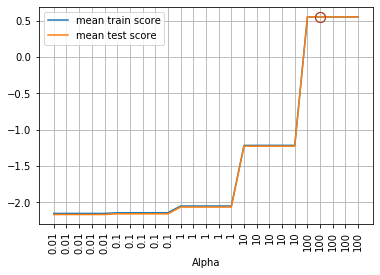

In [150]:
plt.plot(range(output_linearsvr.shape[0]), output_linearsvr['mean_train_score'], label = 'mean train score')
plt.plot(range(output_linearsvr.shape[0]), output_linearsvr['mean_test_score'], label = 'mean test score')
plt.xticks(range(output_linearsvr.shape[0]), output_linearsvr['param_C'], rotation = 90)
plt.plot([grid_search_svrl.best_index_], output_linearsvr['mean_train_score'][grid_search_svrl.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_search_svrl.best_index_], output_linearsvr['mean_test_score'][grid_search_svrl.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

Linear (Simple) SVR Result:
Best parameters: {'C': 100, 'epsilon': 0.1}
Average Cross validation score: 0.5550
Test score: 0.5714

# SVR with kernel 'Linear'

In [151]:
parms_linear = {'C': [0.01,0.1, 1, 10, 100]}

In [153]:
svr_linear_model = SVR(kernel='linear')
grid_svr = GridSearchCV(estimator = svr_linear_model,param_grid = parms_linear,return_train_score=True,n_jobs= -1,cv=6)

In [154]:
grid_svr.fit(X_train_scale,y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

In [155]:
print("Best parameters: {}".format(grid_svr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.6314


In [158]:
svr_model = SVR(kernel = 'linear',C = 100)
        
        #train the model
svr_model.fit(X_train_scale, y_train)
        
        #evaluate the model
print(svr_model.score(X_train_scale, y_train))
print(svr_model.score(X_test_scale, y_test))

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

0.6348328278540143
0.6353844906334997


In [159]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_model , X_train_scale, y_train, cv=kfold)))
vals = cross_val_score(svr_model , X_train_scale, y_train, cv=kfold)
print(np.mean(vals))

Cross-validation scores:
[0.63422556 0.63669179 0.64669818 0.6479737  0.58166086 0.64105005]
0.631383357184734


In [160]:
output_svr_linear = pd.DataFrame(grid_svr.cv_results_)
output_svr_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,16.255866,0.107221,1.939650,0.074600,0.01,{'C': 0.01},-0.054742,-0.061662,-0.054574,-0.057759,...,0.004656,5,-0.058992,-0.057824,-0.057455,-0.058377,-0.059391,-0.057003,-0.058174,0.000837
1,17.143243,0.791652,1.948993,0.210386,0.1,{'C': 0.1},-0.041476,-0.048757,-0.040642,-0.043708,...,0.004734,4,-0.045785,-0.045157,-0.043882,-0.045076,-0.046509,-0.045062,-0.045245,0.000798
2,17.397369,0.371891,2.074771,0.193320,1,{'C': 1},0.070101,0.064285,0.073345,0.072720,...,0.007385,3,0.064905,0.065755,0.066958,0.065359,0.067099,0.063688,0.065627,0.001177
3,16.782994,0.238473,2.016958,0.092639,10,{'C': 10},0.457867,0.459039,0.466940,0.472310,...,0.024842,2,0.449768,0.452084,0.450769,0.450361,0.460493,0.449161,0.452106,0.003858
4,12.728864,0.162196,1.465803,0.035413,100,{'C': 100},0.634226,0.636692,0.646698,0.647974,...,0.022774,1,0.629511,0.628956,0.623595,0.631100,0.638699,0.627956,0.629969,0.004535


([<matplotlib.axis.XTick at 0x21e0f4c30b8>,
 <a list of 5 Text xticklabel objects>)

Text(0.5, 0, 'C')

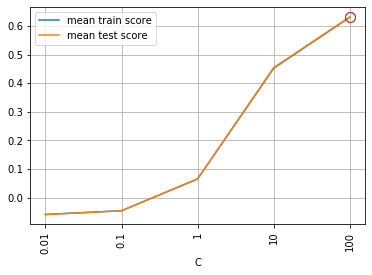

In [161]:
plt.plot(range(output_svr_linear.shape[0]), output_svr_linear['mean_train_score'], label = 'mean train score')
plt.plot(range(output_svr_linear.shape[0]), output_svr_linear['mean_test_score'], label = 'mean test score')
plt.xticks(range(output_svr_linear.shape[0]), output_svr_linear['param_C'], rotation = 90)
plt.plot([grid_svr.best_index_], output_svr_linear['mean_train_score'][grid_svr.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr.best_index_], output_svr_linear['mean_test_score'][grid_svr.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('C')

SVR with Kernel as 'Linear' Result:
Best parameters: {'C': 100}
Average Cross validation score: 0.6313
Test score: 0.6353

# SVR with kernel 'Poly'

In [162]:
parms_svrp = {'C': [1, 10, 100],'degree':[1,3]}

In [163]:
svr_poly_model = SVR(kernel='poly')
grid_svr_poly1 = GridSearchCV(estimator = svr_poly_model,param_grid = parms_svrp,return_train_score=True,n_jobs= -1,cv=3)

In [164]:
grid_svr_poly1.fit(X_train_scale,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'degree': [1, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [165]:
print("Best parameters: {}".format(grid_svr_poly1.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_poly1.best_score_))
pd.DataFrame(grid_svr_poly1.cv_results_)

Best parameters: {'C': 100, 'degree': 1}
Best cross-validation score: 0.2062


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.980691,0.460353,2.778706,0.009513,1,1,"{'C': 1, 'degree': 1}",-0.055817,-0.050827,-0.058735,-0.055126,0.003265,6,-0.056217,-0.053303,-0.055940,-0.055153,0.001313
1,10.105689,0.432827,2.900631,0.032834,1,3,"{'C': 1, 'degree': 3}",-0.055384,-0.050666,-0.057320,-0.054457,0.002795,5,-0.055730,-0.052352,-0.054983,-0.054355,0.001449
2,10.306086,0.546102,2.966709,0.158297,10,1,"{'C': 10, 'degree': 1}",-0.024499,-0.017177,-0.030188,-0.023955,0.005326,3,-0.025420,-0.021319,-0.025313,-0.024017,0.001909
3,10.921282,0.131707,3.234545,0.053433,10,3,"{'C': 10, 'degree': 3}",-0.024842,-0.024014,-0.024109,-0.024322,0.000370,4,-0.024701,-0.017563,-0.026115,-0.022793,0.003743
4,10.879605,0.209138,3.095922,0.047679,100,1,"{'C': 100, 'degree': 1}",0.209063,0.219464,0.190068,0.206198,0.012171,1,0.203979,0.204453,0.209725,0.206052,0.002604
5,7.165883,2.796501,2.040896,0.818454,100,3,"{'C': 100, 'degree': 3}",0.177025,0.138430,0.200229,0.171895,0.025489,2,0.180627,0.207605,0.168006,0.185413,0.016517


In [166]:
svr_pol = SVR(kernel='poly',C=100,degree = 1)
svr_pol.fit(X_train_scale, y_train)
svr_pol.score(X_train_scale, y_train)
svr_pol.score(X_test_scale, y_test)

SVR(C=100, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

0.28374394889912624

0.29004806678585404

In [167]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(logreg, iris.data, iris.target)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_pol, X_train_scale, y_train, cv=kfold)))
vals = cross_val_score(svr_pol, X_train_scale, y_train, cv=kfold)
print(np.mean(vals))

Cross-validation scores:
[0.25284202 0.24968403 0.25938189 0.26149269 0.21341599 0.25768203]
0.24908310807989376


In [168]:
output_svr_poly= pd.DataFrame(grid_svr_poly1.cv_results_)
output_svr_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.980691,0.460353,2.778706,0.009513,1,1,"{'C': 1, 'degree': 1}",-0.055817,-0.050827,-0.058735,-0.055126,0.003265,6,-0.056217,-0.053303,-0.055940,-0.055153,0.001313
1,10.105689,0.432827,2.900631,0.032834,1,3,"{'C': 1, 'degree': 3}",-0.055384,-0.050666,-0.057320,-0.054457,0.002795,5,-0.055730,-0.052352,-0.054983,-0.054355,0.001449
2,10.306086,0.546102,2.966709,0.158297,10,1,"{'C': 10, 'degree': 1}",-0.024499,-0.017177,-0.030188,-0.023955,0.005326,3,-0.025420,-0.021319,-0.025313,-0.024017,0.001909
3,10.921282,0.131707,3.234545,0.053433,10,3,"{'C': 10, 'degree': 3}",-0.024842,-0.024014,-0.024109,-0.024322,0.000370,4,-0.024701,-0.017563,-0.026115,-0.022793,0.003743
4,10.879605,0.209138,3.095922,0.047679,100,1,"{'C': 100, 'degree': 1}",0.209063,0.219464,0.190068,0.206198,0.012171,1,0.203979,0.204453,0.209725,0.206052,0.002604
5,7.165883,2.796501,2.040896,0.818454,100,3,"{'C': 100, 'degree': 3}",0.177025,0.138430,0.200229,0.171895,0.025489,2,0.180627,0.207605,0.168006,0.185413,0.016517


([<matplotlib.axis.XTick at 0x21e0f53c160>,
 <a list of 6 Text xticklabel objects>)

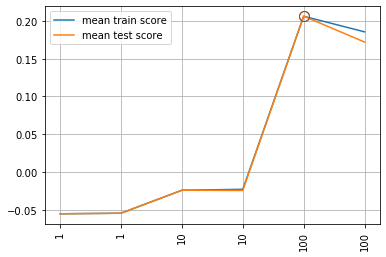

In [169]:
plt.plot(range(output_svr_poly.shape[0]), output_svr_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(output_svr_poly.shape[0]), output_svr_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(output_svr_poly.shape[0]), output_svr_poly['param_C'], rotation = 90)
plt.plot([grid_svr_poly1.best_index_], output_svr_poly['mean_train_score'][grid_svr_poly1.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_poly1.best_index_], output_svr_poly['mean_test_score'][grid_svr_poly1.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

SVR with Kernel as 'Poly' Result:
Best parameters: {'C': 100, 'degree': 1}
Average Cross validation score: 0.2490
Test score: 0.2900

# SVR with kernel 'rbf'

In [170]:
parms_rbf = {'C': [0.1, 1, 10, 100],'gamma':[0.1, 1, 10, 100]}

In [171]:
svr_rbf_model = SVR(kernel='rbf')
grid_svr_rbf1 = GridSearchCV(estimator = svr_rbf_model,param_grid = parms_rbf,return_train_score=True,n_jobs= -1,cv=3)

In [172]:
grid_svr_rbf1.fit(X_train_scale,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [173]:
print("Best parameters: {}".format(grid_svr_rbf1.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_rbf1.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: -0.0412


In [174]:
svr_rbf1 = SVR(kernel='rbf',C=100,gamma=0.1)
svr_rbf1.fit(X_train_scale, y_train)
svr_rbf1.score(X_train_scale, y_train)
svr_rbf1.score(X_test_scale, y_test)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

-0.03284497872152081

-0.03450481563485375

In [175]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_rbf1, X_train_scale, y_train, cv=kfold)))
vals = cross_val_score(svr_rbf1, X_train_scale, y_train, cv=kfold)
print(np.mean(vals))

Cross-validation scores:
[-0.03381098 -0.04146739 -0.03190042 -0.03328877 -0.03862552 -0.04433173]
-0.03723746771095412


In [176]:
output_rbf = pd.DataFrame(grid_svr_rbf1.cv_results_)
output_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.231647,0.081920,3.486480,0.141910,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",-0.059580,-0.054365,-0.061541,-0.058495,0.003028,6,-0.059921,-0.056656,-0.058974,-0.058517,0.001371
1,10.167808,0.021062,3.517541,0.089564,0.1,1,"{'C': 0.1, 'gamma': 1}",-0.059598,-0.054388,-0.061547,-0.058511,0.003022,9,-0.059939,-0.056678,-0.058981,-0.058533,0.001369
2,11.523168,1.286379,4.878902,0.266187,0.1,10,"{'C': 0.1, 'gamma': 10}",-0.059598,-0.054389,-0.061547,-0.058511,0.003022,10,-0.059940,-0.056678,-0.058981,-0.058533,0.001369
3,19.400827,0.166637,8.256718,0.243531,0.1,100,"{'C': 0.1, 'gamma': 100}",-0.059598,-0.054389,-0.061547,-0.058511,0.003022,11,-0.059940,-0.056678,-0.058981,-0.058533,0.001369
4,11.568979,0.137313,3.972651,0.053561,1,0.1,"{'C': 1, 'gamma': 0.1}",-0.059412,-0.054148,-0.061467,-0.058342,0.003082,4,-0.059744,-0.056457,-0.058887,-0.058362,0.001392
5,12.535336,0.163066,4.175453,0.191018,1,1,"{'C': 1, 'gamma': 1}",-0.059593,-0.054384,-0.061547,-0.058508,0.003023,8,-0.059931,-0.056671,-0.058977,-0.058526,0.001369
6,13.612775,0.126324,5.309943,0.038469,1,10,"{'C': 1, 'gamma': 10}",-0.059597,-0.054389,-0.061548,-0.058511,0.003022,12,-0.059936,-0.056675,-0.058979,-0.058530,0.001369
7,19.435095,0.129692,8.378228,0.144763,1,100,"{'C': 1, 'gamma': 100}",-0.059598,-0.054389,-0.061548,-0.058512,0.003022,13,-0.059936,-0.056675,-0.058979,-0.058530,0.001369
8,11.576464,0.108327,4.115675,0.052441,10,0.1,"{'C': 10, 'gamma': 0.1}",-0.057719,-0.052482,-0.060441,-0.056881,0.003303,2,-0.057960,-0.054952,-0.057727,-0.056880,0.001367
9,13.876755,0.987342,4.991816,0.578728,10,1,"{'C': 10, 'gamma': 1}",-0.059543,-0.054339,-0.061531,-0.058471,0.003033,5,-0.059850,-0.056603,-0.058928,-0.058461,0.001366


([<matplotlib.axis.XTick at 0x21e0f58f390>,
 <a list of 6 Text xticklabel objects>)

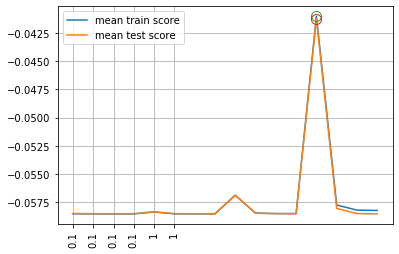

In [177]:
plt.plot(range(output_rbf.shape[0]), output_rbf['mean_train_score'], label = 'mean train score')
plt.plot(range(output_rbf.shape[0]), output_rbf['mean_test_score'], label = 'mean test score')
plt.xticks(range(output_svr_poly.shape[0]), output_rbf['param_C'], rotation = 90)
plt.plot([grid_svr_rbf1.best_index_],output_rbf['mean_train_score'][grid_svr_rbf1.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_rbf1.best_index_], output_rbf['mean_test_score'][grid_svr_rbf1.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

SVR with Kernel as 'rbf' Result:
Best parameters: {'C': 100, 'gamma': 0.1}
Average Cross validation score: -0.0372
Test score: -0.0345

# Best Model for the prediction

From all the cross validation score and the test score for above models, it is clear that the polynominal regression is the best model to predict the house prices.

In [178]:
qwerty = {'Model': ['Linear Regression', 'KNN Regression','Ridge Regression','Lasso Regression','Polynominal Regression','Simple SVR','SVR with Linear kernel','SVR with Poly kernel','SVR with rbf kernel'], 
     'Cross-Validation Score': [grid_search_lr.best_score_, grid_search_knn.best_score_,grid_ridge.best_score_,grid_lasso.best_score_,grid_search_poly.best_score_,grid_search_svrl.best_score_,grid_svr.best_score_,grid_svr_poly1.best_score_,grid_svr_rbf1.best_score_]}

In [179]:
final_output = pd.DataFrame(data=qwerty)
final_output

,Model,Cross-Validation Score
0,Linear Regression,0.703861
1,KNN Regression,0.705064
2,Ridge Regression,0.704405
3,Lasso Regression,0.704398
4,Polynominal Regression,0.791462
5,Simple SVR,0.554876
6,SVR with Linear kernel,0.631383
7,SVR with Poly kernel,0.206198
8,SVR with rbf kernel,-0.041249


In [180]:
pol = PolynomialFeatures(degree = 2)
Xpol = pol.fit_transform(X_traindata)
Xtpol = pol.fit_transform(X_testdata)
pol_reg_model = LinearRegression()
pol_reg_model.fit(Xpol,y_train)
y_pred = pol_reg_model.predict(Xtpol)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
with np.printoptions(threshold=np.inf):
    print(y_pred)

[ 341592.73748714  702667.37247121  484602.50295557  429294.5658748
  378655.41394655  291045.28972087  910598.44690343  921104.77044669
  460617.47636302  586550.66735013  731339.96841915  394659.86169827
  475202.76408218  426663.4563321   822995.07744168  758350.51684819
  654129.84569643  666326.41223673  298051.40156476  590545.8861292
  559036.56963371  385054.50486406  221439.51622809  547973.74209088
  337678.89718459  753777.2049035   429844.95224516  224468.29138376
  478858.97366694  431388.71704354  489926.17792625  414934.53985176
  292005.225144    332530.38085852  852038.84558054  265890.48536271
  316982.5315212   262758.25376737  548420.44289669  384402.02524814
  457103.03000892  750349.86201475 1187279.83665116  794666.3712254
  426534.65943564  397197.2599421   689819.85399862  474513.44564784
  379118.43899577  883936.92415974 1041522.6393923   751245.46532998
  513185.35124074  339291.46422092  333044.71135102  479922.34706489
  436833.70816643  231423.12433456  2